In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Logistic Regression



---


Welcome to today's class. Here we will learn about logistic regression and code it up. If you are ready then let's get started!.

As we have learnt already, logistic regression is used in the problem of binary classification where you have some input features $X \in \mathbf{R}^{NXD}$ and binary targets $y\in \{0,1\}$.

- Intuitively, we want a separator which could be a simple line (for our 2D data), also called a ***hyperplane*** or ***decision boundary***. 
In a simple setting, the probability that the target y assumes a value of 0 and 1 are written as; $$p(y=1|x,\theta) = h_\theta(x) $$
$$p(y=0|x,\theta) = 1 - h_\theta(x)$$

where $$h_\theta(z) = \frac{1}{1+\text{exp}(-z)}$$ and $$z = \theta^Tx + b$$

- We can then write the our bernoulli likelihood as 
$$p(y|x,\theta) = h_\theta(z)^y (1- h_\theta(z))^{(1-y)} $$ 


---


### Negative log-likelihood/ Cost function (for N examples);


---


$$-\text{log}p(y|x,\theta) = -\frac{1}{N}\sum^N_{i=1}(y_i\text{log}h_\theta(x_i) + (1 - y_i)\text{log}(1 - h_\theta(x_i))$$

Note that we are interested in maximizing the log-likelihood == minimizing the negative log-likelihood in our maximum likelihood estimation (MLE) formulation == minimizing the empirical risk.

The negative log-likelihood for binary classification task is also referred to as the *binary cross-entropy loss*.

---
### Gradient
---

- You can train your logistic regression model now with gradient descent method of your choice.
If you would remember $$\frac{\delta\mathcal{L}}{dw} = \frac{1}{N}\sum_{i=1}^{N}(h_\theta(x_i) - y_i)x_i$$
$$\frac{\delta\mathcal{L}}{db} = \frac{1}{N}\sum_{i=1}^{N}(h_\theta(x_i) - y_i)$$
---


1. As a first step, lets get some data and visualise them.
Before you do any learning on this data, can you think of a good hyperplane that can separate the two classes well?

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

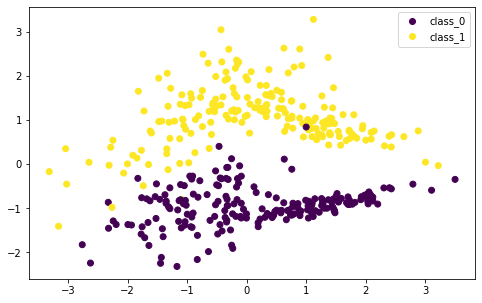

In [ ]:
# generate classification data
X, y = datasets.make_classification(400, 2, 2, 0, random_state=1004)

fig = plt.figure(figsize=(8, 5))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y)
plt.legend(handles=scatter.legend_elements()[0], labels=['class_0','class_1'])

2. Split the data into train and test. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=92)

3. Next can you guess and list the variables and functions you need for a complete logistic regression model? List them in the next cell.

In [ ]:
"""
List here
Variables / parameters/ inputs/ etc
======================================
1. linear function = theta.T x + b
2. 
3.
4.
etc...

Functions
======================================
1.
2.
3.
etc...
"""
pass

In [ ]:
#@title Functions and variables you need to define { display-mode: "form" }
"""
Great!
If you listed the following, you are good to go!
1. linear function z = x\theta + b
2. sigmoid h_theta(x)
3. loss function()
4. gradient descent function
5. predict function
6. train function
7. classification error
8. accuracy function
9. plot functions etc
"""

pass

4. Code up each of these functions or methods (for a class) and finally plot the decision boundary

Possible results, it might be different in your case depending on the hyperparameters
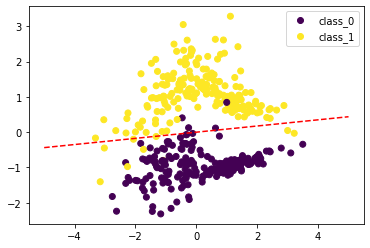
# Lets go!

In [1]:
class LogisitcRegression:
  '''
  This class implements logisitic regression for binary classification using stochasitc gradient descenet
  Constructor parameters:
    iterations: number of SGD iterations
    lr: learning rate for weights update
  '''

  def __init__(self, iterations, lr):
    self.lr = lr
    self.iterations = iterations

  def sigmoid(self, z):
    return 1/(1 + np.exp(-z))
  
  def linear(self, x, theta, b):
    return theta.T.dot(x) + b

  def h(self, x, theta, b):
    return self.sigmoid(self.linear(x, theta, b))

  # Gradient with respect to w
  def grad_w(self, x, theta, b, y):
    h = self.h(x, theta, b)
    grad = (h - y) * x
    return grad
  # Gradient with respect to b
  def grad_b(self, x, theta, b, y):
    h = self.h(x, theta, b)
    grad = (h - y)
    return grad

  # Fit the data using SGD
  def train(self, X, Y):
    epochs = self.iterations
    theta = np.random.randn(X.shape[1])
    b = 0
    losses = []
    n = len(X)
    for epoch in range(epochs):
      inds = np.random.choice(len(X), size=len(X), replace=False) # shuffle the indices to select random sample for each epoch
      loss = 0
      for i in inds:
        x = X[i]
        y = Y[i]
        theta = theta - self.lr * self.grad_w(x, theta, b, y) # update the weights vector
        b = b - self.lr * self.grad_b(x, theta, b, y) # update the bias teem
        h = self.h(x, theta, b)
        loss += (-(y*h + (1-y)*(1-h) ))
      losses.append(loss)
    self.theta = theta
    self.b = b
    return losses

  def predict(self, x):
    linear = x.dot(self.theta.reshape(-1, 1)) + self.b
    h = self.sigmoid(linear)
    final_pred = h[:]
    final_pred[h > 0.5] = 1
    final_pred[h <= 0.5] = 0
    return final_pred

  # compute the model accuracy 
  def accuracy(self, pred, y):
    return 100 * (np.sum(pred == y) / len(y))
    
  # return the decision boundaru
  def decisionLine(self, x):
    slope = - (self.theta[0]/self.theta[1])
    intercept = - self.b/self.theta[1]
    return (slope*x + intercept)
  

In [ ]:
clf = LogisitcRegression(10000, 0.05)

In [ ]:
losses = clf.train(X_train, y_train)

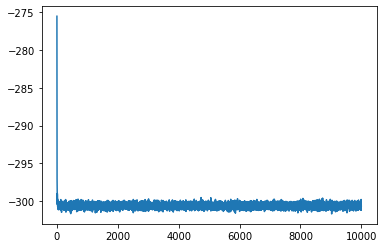

In [ ]:
plt.plot(losses)

In [ ]:
pred = clf.predict(X_test)

In [ ]:
clf.accuracy(pred.flatten(), y_test)

97.5

In [ ]:
line = clf.decisionLine(X[:, 0])
len(line)

400

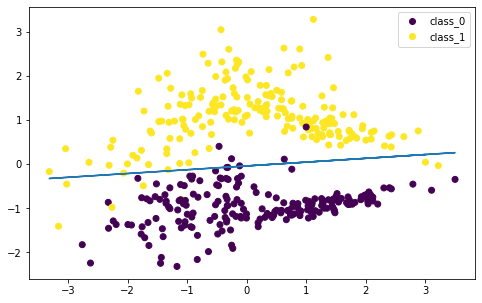

In [ ]:
fig = plt.figure(figsize=(8, 5))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y)
plt.legend(handles=scatter.legend_elements()[0], labels=['class_0','class_1'])

plt.plot(X[:,0], line.flatten())